# Driving behavior - Clean data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_training = pd.read_csv("data/train_motion_data.csv")
df_testing = pd.read_csv("data/test_motion_data.csv")

print(df_training.head())
print(df_testing.head())

       AccX      AccY      AccZ     GyroX     GyroY     GyroZ   Class  \
0  0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938  NORMAL   
1 -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536  NORMAL   
2 -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888  NORMAL   
3  0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902  NORMAL   
4  0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902  NORMAL   

   Timestamp  
0    3581629  
1    3581630  
2    3581630  
3    3581631  
4    3581631  
       AccX      AccY      AccZ     GyroX     GyroY     GyroZ       Class  \
0  0.758194 -0.217791  0.457263  0.000000  0.000000  0.000000  AGGRESSIVE   
1  0.667560 -0.038610  0.231416 -0.054367 -0.007712  0.225257  AGGRESSIVE   
2  2.724449 -7.584121  2.390926  0.023824  0.013668 -0.038026  AGGRESSIVE   
3  2.330950 -7.621754  2.529024  0.056810 -0.180587 -0.052076  AGGRESSIVE   
4  2.847215 -6.755621  2.224640 -0.031765 -0.035201  0.035277  AGGRESSIVE   

   Times

In [3]:
print(df_training.isna().sum())
print(df_testing.isna().sum())

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64
AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64


In [4]:
df_training.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


In [5]:
df_training = df_training.replace({"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,0,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,0,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,0,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,0,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,0,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,2,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,2,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,2,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,2,3583791


<AxesSubplot:>

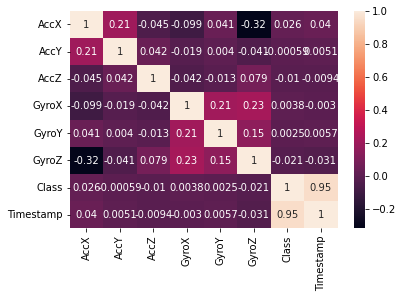

In [6]:
sns.heatmap(df_training.corr(), annot=True)

### Accelerometer android

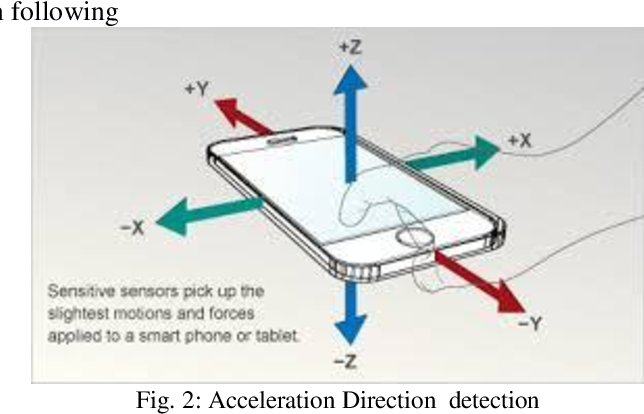

Seeing our correlation heatmap and the image for the accelerometer, we can say that the acceleration in the Z axis would not help us to create our models, because we don't care about acceleration going up (if we assume the phone was lying down), and probably in this axis we would have more noise that just wouldn't help us for our problem.